In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
matt_crashes = pd.read_csv('Crashes.csv')
del matt_crashes['Unnamed: 0']
matt_crashes.head()
matt_crashes.shape

(162055, 34)

In [12]:
matt_crashes.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [13]:
sunday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 1, ['CRASH_HOUR']]
monday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 2, ['CRASH_HOUR']]
tuesday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 3, ['CRASH_HOUR']]
wednesday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 4, ['CRASH_HOUR']]
thursday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 5, ['CRASH_HOUR']]
friday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 6, ['CRASH_HOUR']]
saturday = matt_crashes.loc[matt_crashes['CRASH_DAY_OF_WEEK'] == 7, ['CRASH_HOUR']]

day_list = []
day_list.append(len(sunday['CRASH_HOUR']))
day_list.append(len(monday['CRASH_HOUR']))
day_list.append(len(tuesday['CRASH_HOUR']))
day_list.append(len(wednesday['CRASH_HOUR']))
day_list.append(len(thursday['CRASH_HOUR']))
day_list.append(len(friday['CRASH_HOUR']))
day_list.append(len(saturday['CRASH_HOUR']))
#Figure out a way to loop this

Text(0.5,1,'Number of Crashes by Day of Ocurrence')

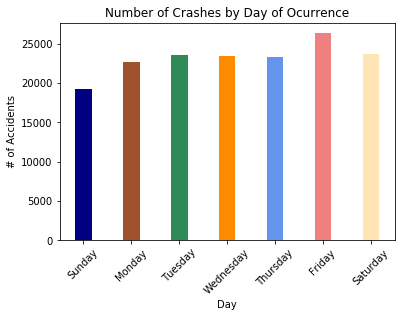

In [14]:
week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
color = ['navy', 'sienna', 'seagreen', 'darkorange', 'cornflowerblue', 'lightcoral', 'moccasin']
plt.bar(week, day_list, width=0.35, color=color)
plt.ylabel('# of Accidents')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.title('Number of Crashes by Day of Ocurrence')

In [15]:
matt_crashes['CRASH_HOUR'].value_counts()

16    12498
15    12402
17    12261
14    10922
18    10093
13     9705
12     9247
8      9200
11     7973
9      7963
7      7630
10     7324
19     7153
20     5671
21     5221
22     4910
23     4043
6      3805
0      3124
1      2668
2      2396
5      2218
3      1912
4      1716
Name: CRASH_HOUR, dtype: int64

In [16]:
crash_hours = pd.DataFrame(matt_crashes[['CRASH_DAY_OF_WEEK', 'CRASH_HOUR']])
hrs = [-1, 6, 10, 14, 19, 23]
groups = ['Midnight - 6AM', '7AM - 10AM', '11AM - 2PM', '3PM - 7PM', '8PM - 11PM']
crash_hours['Hours'] = pd.cut(crash_hours['CRASH_HOUR'], bins=hrs, labels=groups)
crash_hours = crash_hours.groupby('CRASH_DAY_OF_WEEK')
crash_hours

In [17]:
sunday['CAT'] = pd.cut(sunday['CRASH_HOUR'], bins=hrs, labels=groups)
sunday_grouped = sunday.groupby('CAT')
sun_list = sunday_grouped['CRASH_HOUR'].count().tolist()
monday['CAT'] = pd.cut(monday['CRASH_HOUR'], bins=hrs, labels=groups)
monday_grouped = monday.groupby('CAT')
mon_list = monday_grouped['CRASH_HOUR'].count().tolist()
tuesday['CAT'] = pd.cut(tuesday['CRASH_HOUR'], bins=hrs, labels=groups)
tuesday_grouped = tuesday.groupby('CAT')
tues_list = tuesday_grouped['CRASH_HOUR'].count().tolist()
wednesday['CAT'] = pd.cut(wednesday['CRASH_HOUR'], bins=hrs, labels=groups)
wednesday_grouped = wednesday.groupby('CAT')
wed_list = wednesday_grouped['CRASH_HOUR'].count().tolist()
thursday['CAT'] = pd.cut(thursday['CRASH_HOUR'], bins=hrs, labels=groups)
thursday_grouped = thursday.groupby('CAT')
thurs_list = thursday_grouped['CRASH_HOUR'].count().tolist()
friday['CAT'] = pd.cut(friday['CRASH_HOUR'], bins=hrs, labels=groups)
friday_grouped = friday.groupby('CAT')
fri_list = friday_grouped['CRASH_HOUR'].count().tolist()
saturday['CAT'] = pd.cut(saturday['CRASH_HOUR'], bins=hrs, labels=groups)
saturday_grouped = saturday.groupby('CAT')
sat_list = saturday_grouped['CRASH_HOUR'].count().tolist()
#Figure out a way to loop or function this

In [18]:
new_df = pd.DataFrame({'Category': ['Midnight - 6AM', '7AM - 10AM', '11AM - 2PM', '3PM - 7PM', '8PM - 11PM'],
                       'Sunday': sun_list,
                       'Monday': mon_list,
                       'Tuesday': tues_list,
                       'Wednesday': wed_list,
                       'Thursday': thurs_list,
                       'Friday': fri_list,
                       'Saturday': sat_list
                       })
#del new_df['Category']
new_df.set_index('Category', inplace=True)
new_df

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Category,,,,,,,
Midnight - 6AM,4468,2268,1821,1817,1894,2072,3499
7AM - 10AM,2210,5246,5597,5611,5302,5017,3134
11AM - 2PM,4626,5132,5306,5353,5130,6107,6193
3PM - 7PM,5301,7818,8460,8133,8322,9417,6956
8PM - 11PM,2578,2136,2382,2496,2605,3699,3949


In [19]:
grouped_bar = new_df.transpose(copy=True)
grouped_bar

Category,Midnight - 6AM,7AM - 10AM,11AM - 2PM,3PM - 7PM,8PM - 11PM
Sunday,4468,2210,4626,5301,2578
Monday,2268,5246,5132,7818,2136
Tuesday,1821,5597,5306,8460,2382
Wednesday,1817,5611,5353,8133,2496
Thursday,1894,5302,5130,8322,2605
Friday,2072,5017,6107,9417,3699
Saturday,3499,3134,6193,6956,3949


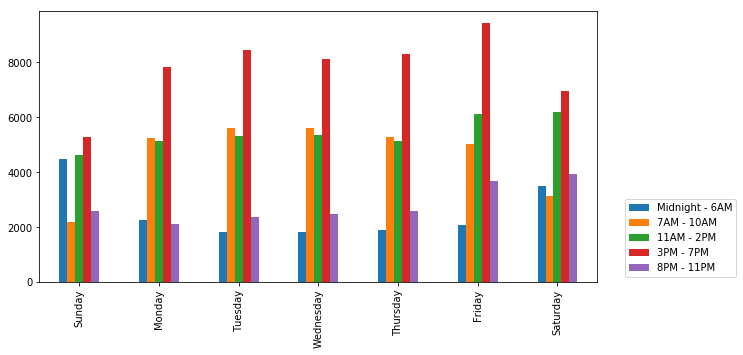

In [20]:
grouped_bar.plot.bar(figsize = (10, 5))
plt.legend(loc='lower left', bbox_to_anchor=(1.04, 0))
plt.show()

In [21]:
matt_crashes.columns

Index(['RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [46]:
matt_crashes['CRASH_DATE_STR'] = matt_crashes['CRASH_DATE'].astype(str)
matt_crashes['CRASH_DATE'] = pd.to_datetime(matt_crashes['CRASH_DATE'])
matt_crashes['CRASH_DATE'] = matt_crashes['CRASH_DATE'].astype(str)
matt_crashes['YEAR'] = matt_crashes['CRASH_DATE'].str[:4]
matt_crashes['YEAR'].head()
by_year_df = matt_crashes[['YEAR', 'CRASH_MONTH']]

In [47]:
seventeen = by_year_df.loc[by_year_df['YEAR'] == '2017']
years = seventeen.groupby('CRASH_MONTH').count().rename(columns={'YEAR': '2017'})
fourteen = by_year_df.loc[by_year_df['YEAR'] == '2014']
years['2014'] = fourteen.groupby('CRASH_MONTH').count()['YEAR']
fifteen = by_year_df.loc[by_year_df['YEAR'] == '2015']
years['2015'] = fifteen.groupby('CRASH_MONTH').count()['YEAR']
sixteen = by_year_df.loc[by_year_df['YEAR'] == '2016']
years['2016'] = sixteen.groupby('CRASH_MONTH').count()['YEAR']
seventeen = by_year_df.loc[by_year_df['YEAR'] == '2017']
years['2017'] = seventeen.groupby('CRASH_MONTH').count()['YEAR']
eighteen = by_year_df.loc[by_year_df['YEAR'] == '2018']
years['2018'] = eighteen.groupby('CRASH_MONTH').count()['YEAR']
years = years.fillna(0)
years.reset_index('CRASH_MONTH', inplace=True)
years

,CRASH_MONTH,2017,2014,2015,2016,2018
0,1,3503,0.0,0.0,2387,5955.0
1,2,3356,0.0,1.0,2198,5325.0
2,3,4143,0.0,0.0,2449,5772.0
3,4,4211,0.0,2.0,2395,6140.0
4,5,4901,0.0,2.0,2583,6584.0
5,6,5058,0.0,2.0,2332,6593.0
6,7,5766,0.0,14.0,2738,6184.0
7,8,5920,2.0,417.0,3661,5946.0
8,9,5976,0.0,1322.0,3855,5714.0
9,10,6466,0.0,2494.0,4090,618.0


In [48]:
years_to_plot = years[['CRASH_MONTH', '2014', '2015', '2016', '2017', '2018']]
years_to_plot

,CRASH_MONTH,2014,2015,2016,2017,2018
0,1,0.0,0.0,2387,3503,5955.0
1,2,0.0,1.0,2198,3356,5325.0
2,3,0.0,0.0,2449,4143,5772.0
3,4,0.0,2.0,2395,4211,6140.0
4,5,0.0,2.0,2583,4901,6584.0
5,6,0.0,2.0,2332,5058,6593.0
6,7,0.0,14.0,2738,5766,6184.0
7,8,2.0,417.0,3661,5920,5946.0
8,9,0.0,1322.0,3855,5976,5714.0
9,10,0.0,2494.0,4090,6466,618.0


In [54]:
yr_list_1 = [x + 12 for x in years_to_plot['CRASH_MONTH']]
yr_list_1

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

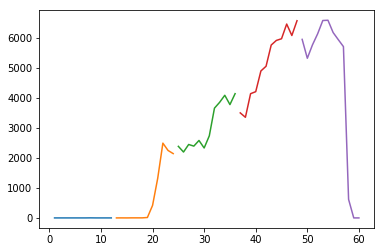

In [60]:
#x_rng = np.arange(0, 60, 1)
#plt.plot(x_rng)
plt.plot(years_to_plot['CRASH_MONTH'], years_to_plot['2014'])
yr_list = [x + 12 for x in years_to_plot['CRASH_MONTH']]
plt.plot(yr_list, years_to_plot['2015'])
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2016'])
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2017'])
yr_list = [x + 12 for x in yr_list]
plt.plot(yr_list, years_to_plot['2018'])

In [ ]:
x_ticks(['October, 2015', 'August, 2016', ''])